# 분석한 데이터 기반 knn모델 적용하기 

<br>
</br>

2가지만 고려 203040직장인 인기 지역,203040유동인구 인기 지역 
<br>
</br>

* 2030 3040기준 상권 분석하기

<br>
</br>

0
<br>
</br>

직장인구인기 영역 : 종합병원수 ,교통시설, 접객시설
부족: 아파트 단지,학교수,203040유동인구,총상주인구 
<br>
</br>

1
<br>
</br>
유동인구인기 영역 : 아파트단지수 , 학교수,총상구 인주 
부족: 종합병원 ,교통시설,접객시설,직장인구 
<br>
</br>





In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
plt.rc("font", family = "Malgun Gothic")

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [173]:
file_path="C:/Users/maeng/Ai 내용 정리 및 실습 내용/data/데사응텀프/"
scaling_data = pd.read_csv(file_path+"scaling_data")

result_data = pd.read_csv(file_path+"result_data.csv")






In [174]:
result_data['상권_구분_코드_명'].value_counts()

골목상권    1085
전통시장     284
발달상권     248
관광특구       6
Name: 상권_구분_코드_명, dtype: int64

In [175]:
scaling_data.isnull().sum()

Unnamed: 0        0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
총_상주인구_수          0
연령대_20_유동인구_수     0
연령대_30_유동인구_수     0
연령대_40_유동인구_수     0
관광숙박              0
교육                0
쇼핑                0
오락서비스             0
음식점               0
의료                0
의류잡화              0
카페                0
집객시설_수            0
교통시설_수            0
학교_수              0
종합병원_수            0
아파트_단지_수          0
연령대_20_직장_인구_수    0
연령대_30_직장_인구_수    0
연령대_40_직장_인구_수    0
dtype: int64

In [176]:
result_data.isnull().sum()

Unnamed: 0        0
총_상주인구_수          0
상권_구분_코드_명        0
상권_코드_명           0
연령대_20_유동인구_수     0
상권_코드             0
연령대_30_유동인구_수     0
연령대_40_유동인구_수     0
관광숙박              0
교육                0
쇼핑                0
오락서비스             0
음식점               0
의료                0
의류잡화              0
카페                0
집객시설_수            0
교통시설_수            0
학교_수              0
종합병원_수            0
아파트_단지_수          0
연령대_20_매출_금액      0
연령대_20_매출_건수      0
연령대_30_매출_금액      0
연령대_30_매출_건수      0
연령대_40_매출_금액      0
연령대_40_매출_건수      0
연령대_20_직장_인구_수    0
연령대_30_직장_인구_수    0
연령대_40_직장_인구_수    0
dtype: int64

In [177]:
scaling_data.head()

,Unnamed: 0,상권_구분_코드_명,상권_코드,상권_코드_명,총_상주인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,관광숙박,교육,...,의류잡화,카페,집객시설_수,교통시설_수,학교_수,종합병원_수,아파트_단지_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수
0,0,골목상권,3110346.0,4.19민주묘지역 2번,0.063226,0.108410,0.067422,0.078290,0.005546,0.001961,...,0.000620,0.015727,0.020202,0.045977,0.142857,0.019231,0.035165,0.000442,0.000382,0.000813
1,1,골목상권,3111083.0,GS강동자이아파트,0.169884,0.159370,0.164175,0.191371,0.023267,0.034979,...,0.000862,0.025488,0.016835,0.034483,0.000000,0.000000,0.080299,0.002469,0.001823,0.002993
2,2,골목상권,3110722.0,G타워,0.200134,0.220727,0.204151,0.137160,0.012658,0.001961,...,0.000635,0.034707,0.003367,0.000000,0.000000,0.019231,0.019798,0.005602,0.008704,0.010648
3,3,골목상권,3110547.0,KB국민은행 망원동지점,0.132989,0.253086,0.238963,0.234374,0.024955,0.025499,...,0.001256,0.041757,0.028620,0.034483,0.000000,0.038462,0.073515,0.000479,0.001382,0.003977
4,4,골목상권,3110570.0,KB국민은행 서강지점,0.026764,0.059591,0.072161,0.083248,0.007836,0.024191,...,0.000242,0.014100,0.011785,0.022989,0.000000,0.019231,0.004153,0.000147,0.000647,0.000770


In [178]:

scaling_data = scaling_data.drop(['Unnamed: 0'], axis=1)

In [179]:
# 상권 코드 기준으로 다 묶어서 평균 구한것이다 
detail_columns = ['관광숙박', '교육', '쇼핑', '오락서비스', '음식점', '의료', '의류잡화', '카페']
detail_data = scaling_data[detail_columns].groupby(scaling_data['상권_코드_명']).mean()

In [180]:
detail_data.isnull().sum()

관광숙박     0
교육       0
쇼핑       0
오락서비스    0
음식점      0
의료       0
의류잡화     0
카페       0
dtype: int64

In [181]:
num_colum = ['총_상주인구_수', '연령대_20_유동인구_수','연령대_30_유동인구_수', '연령대_40_유동인구_수','연령대_20_직장_인구_수', '연령대_30_직장_인구_수','연령대_40_직장_인구_수','집객시설_수', '교통시설_수', 
             '학교_수', '종합병원_수', '아파트_단지_수'
]      

num_data = scaling_data[num_colum].groupby(scaling_data["상권_코드_명"]).mean()




In [182]:
num_data.isnull().sum()

총_상주인구_수          0
연령대_20_유동인구_수     0
연령대_30_유동인구_수     0
연령대_40_유동인구_수     0
연령대_20_직장_인구_수    0
연령대_30_직장_인구_수    0
연령대_40_직장_인구_수    0
집객시설_수            0
교통시설_수            0
학교_수              0
종합병원_수            0
아파트_단지_수          0
dtype: int64

In [183]:
num_data.head()

,총_상주인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,집객시설_수,교통시설_수,학교_수,종합병원_수,아파트_단지_수
상권_코드_명,,,,,,,,,,,,
4.19민주묘지역 2번,0.063226,0.108410,0.067422,0.078290,0.000442,0.000382,0.000813,0.020202,0.045977,0.142857,0.019231,0.035165
63빌딩,0.000000,0.000000,0.000000,0.000000,0.043009,0.063428,0.128165,0.011785,0.000000,0.000000,0.019231,0.001800
DMC(디지털미디어시티),0.000000,0.000000,0.000000,0.000000,0.062320,0.094922,0.122135,0.132997,0.241379,0.000000,0.192308,0.000000
GS강동자이아파트,0.169884,0.159370,0.164175,0.191371,0.002469,0.001823,0.002993,0.016835,0.034483,0.000000,0.000000,0.080299
G타워,0.200134,0.220727,0.204151,0.137160,0.005602,0.008704,0.010648,0.003367,0.000000,0.000000,0.019231,0.019798


In [184]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(num_data)
    wss.append(kmeans.inertia_)

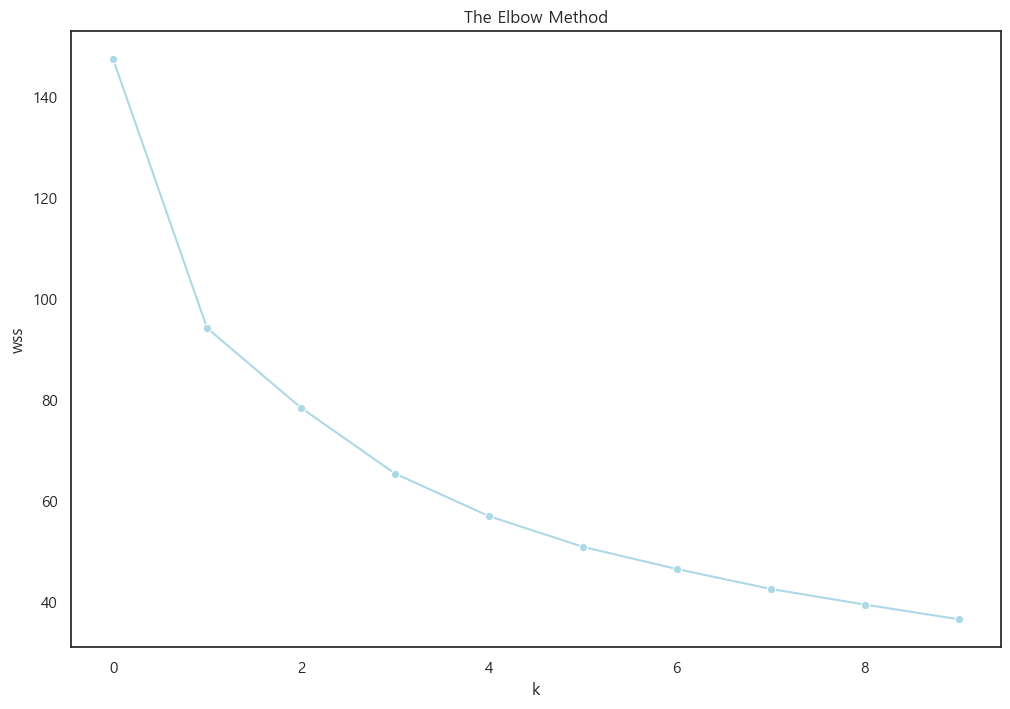

In [185]:

plt.figure(figsize= (12, 8))
sns.lineplot(wss, marker='o', color='lightblue')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

In [186]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data) 
  cluster = kmeans.predict(num_data) 
  score = silhouette_score(num_data, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 2 일 때의 실루엣 점수 : 0.42
k = 3 일 때의 실루엣 점수 : 0.43
k = 4 일 때의 실루엣 점수 : 0.34
k = 5 일 때의 실루엣 점수 : 0.34
k = 6 일 때의 실루엣 점수 : 0.31
k = 7 일 때의 실루엣 점수 : 0.32
k = 8 일 때의 실루엣 점수 : 0.32
k = 9 일 때의 실루엣 점수 : 0.32
k = 10 일 때의 실루엣 점수 : 0.33
k = 3 일 때 가장 높은 실루엣 점수 0.43을 얻는다


In [187]:
# 인기 있다 없다 구분 위해 k=2

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(num_data)
cluster
     

array([0, 0, 0, ..., 0, 0, 0])

In [188]:

num_data['cluster'] = cluster

In [189]:
num_data.head()

,총_상주인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,집객시설_수,교통시설_수,학교_수,종합병원_수,아파트_단지_수,cluster
상권_코드_명,,,,,,,,,,,,,
4.19민주묘지역 2번,0.063226,0.108410,0.067422,0.078290,0.000442,0.000382,0.000813,0.020202,0.045977,0.142857,0.019231,0.035165,0
63빌딩,0.000000,0.000000,0.000000,0.000000,0.043009,0.063428,0.128165,0.011785,0.000000,0.000000,0.019231,0.001800,0
DMC(디지털미디어시티),0.000000,0.000000,0.000000,0.000000,0.062320,0.094922,0.122135,0.132997,0.241379,0.000000,0.192308,0.000000,0
GS강동자이아파트,0.169884,0.159370,0.164175,0.191371,0.002469,0.001823,0.002993,0.016835,0.034483,0.000000,0.000000,0.080299,1
G타워,0.200134,0.220727,0.204151,0.137160,0.005602,0.008704,0.010648,0.003367,0.000000,0.000000,0.019231,0.019798,1


In [190]:
num_data.to_csv(file_path+"cluster_data.csv")

In [191]:
num_data.columns

Index(['총_상주인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '집객시설_수',
       '교통시설_수', '학교_수', '종합병원_수', '아파트_단지_수', 'cluster'],
      dtype='object')

Text(0, 0.5, '표준 데이터 값')

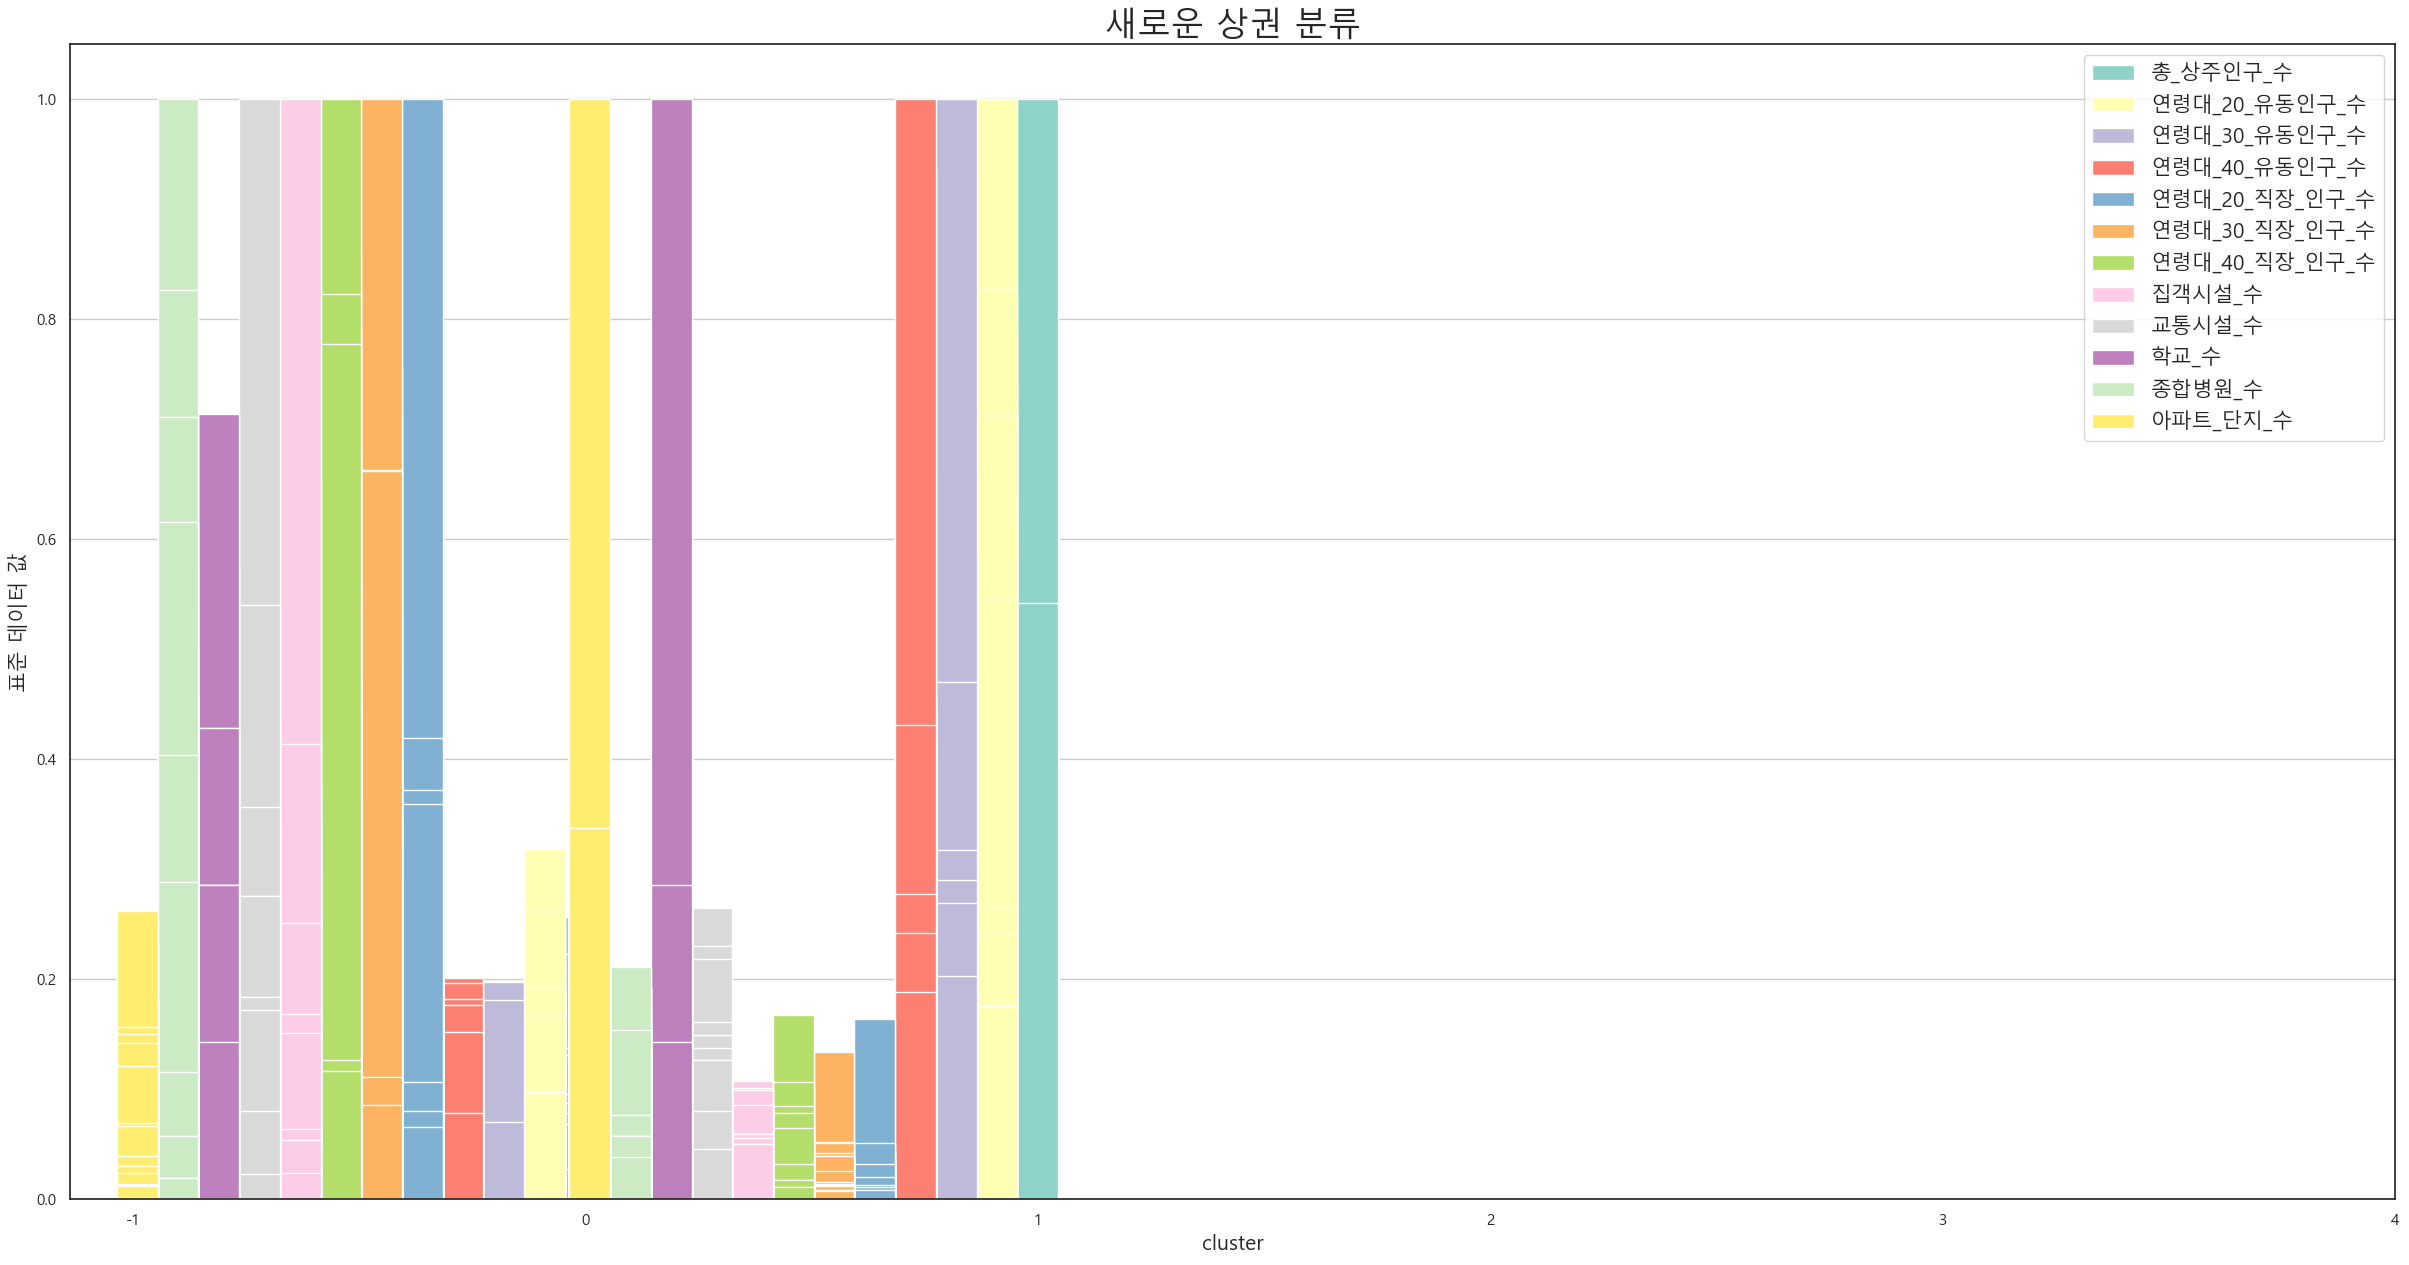

In [192]:
plt.rcParams['figure.figsize'] = (30, 15)
color = sns.color_palette("Set3", len(num_data.columns))

for idx, column in enumerate(num_colum):
  plt.bar(num_data['cluster'] - idx * 0.09, num_data[column], label=column, width=0.09, color=color[idx])

plt.title('새로운 상권 분류', fontsize=24)
plt.legend(fontsize=15)
plt.grid(True, axis='y')
plt.xticks([-1, 0, 1, 2, 3, 4])
plt.xlabel('cluster', fontsize=15)
plt.ylabel('표준 데이터 값', fontsize=15)

In [193]:
area0 = num_data[num_data['cluster'] == 0].index

In [194]:
area0_data = pd.DataFrame(columns=detail_columns)

In [195]:

for area in area0:
  area0_data = area0_data.append(detail_data[detail_data.index == area][detail_columns])

In [196]:
area0_detail = area0_data.mean()

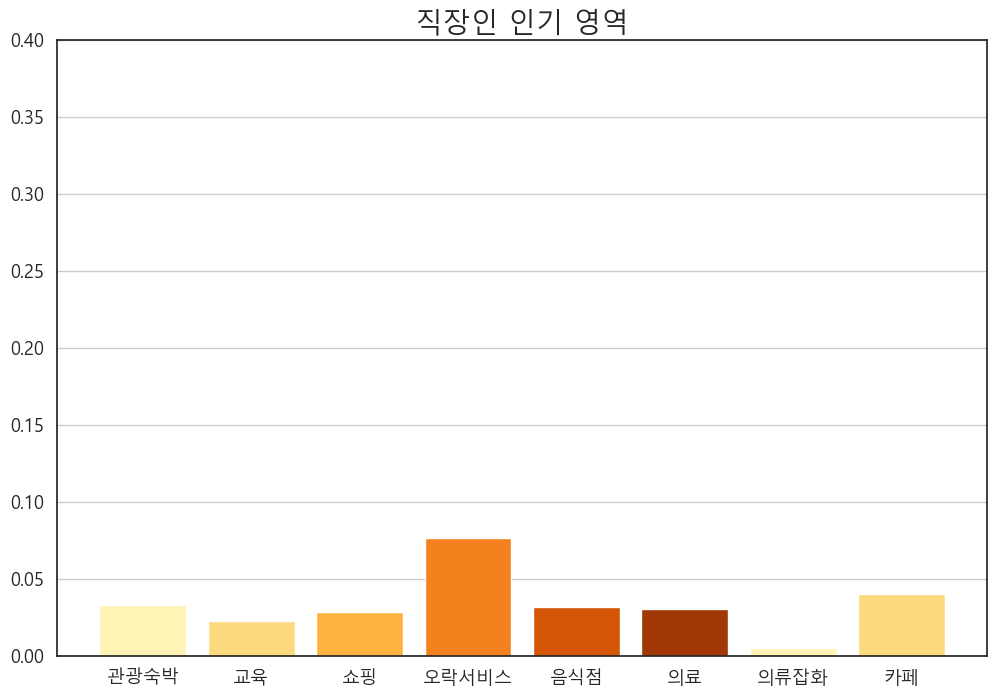

In [197]:

plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('직장인 인기 영역', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area0_detail.index, area0_detail, color=color)
plt.grid(True, axis='y')

In [198]:
area0_sales_data = pd.DataFrame(columns=[
'상권_코드_명', '상권_구분_코드_명','연령대_20_매출_금액','연령대_20_매출_건수','연령대_30_매출_금액','연령대_30_매출_건수','연령대_40_매출_금액','연령대_40_매출_건수'
])

In [199]:
area0_sales_data.head()

,상권_코드_명,상권_구분_코드_명,연령대_20_매출_금액,연령대_20_매출_건수,연령대_30_매출_금액,연령대_30_매출_건수,연령대_40_매출_금액,연령대_40_매출_건수


In [202]:
for area in area0:
    area0_sales_data = area0_sales_data.append(result_data[['상권_코드_명', '상권_구분_코드_명','연령대_20_매출_금액','연령대_20_매출_건수','연령대_30_매출_금액','연령대_30_매출_건수','연령대_40_매출_금액','연령대_40_매출_건수']][result_data['상권_코드_명'] == area])

In [203]:

area0_sales_data.head()

,상권_코드_명,상권_구분_코드_명,연령대_20_매출_금액,연령대_20_매출_건수,연령대_30_매출_금액,연령대_30_매출_건수,연령대_40_매출_금액,연령대_40_매출_건수
0,4.19민주묘지역 2번,골목상권,2.253243e+09,191373.0,3.216842e+09,193695.0,4.066542e+09,207888.0
1189,63빌딩,발달상권,2.017414e+09,246528.0,4.232148e+09,413606.0,3.840371e+09,323267.0
1138,DMC(디지털미디어시티),발달상권,6.991784e+10,7810623.0,1.197389e+11,10342375.0,1.056423e+11,7533308.0
4,KB국민은행 서강지점,골목상권,1.017327e+09,158304.0,1.707443e+09,237094.0,2.315982e+09,226602.0
5,KB국민은행 종암동지점,골목상권,3.165664e+08,22395.0,5.177845e+08,25275.0,6.975617e+08,32808.0


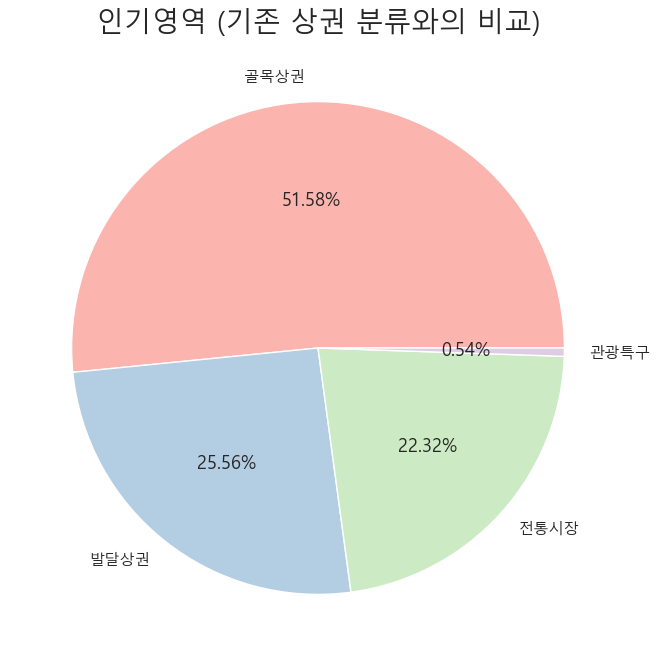

In [204]:
color = sns.color_palette("Pastel1", 4)
plt.title('인기영역 (기존 상권 분류와의 비교)', fontsize=20)
plt.rcParams['font.size'] = 13
plt.pie(area0_sales_data['상권_구분_코드_명'].value_counts(), labels=area0_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

In [205]:
area1 = num_data[num_data['cluster'] == 1].index

In [206]:
area1_data = pd.DataFrame(columns=detail_columns)

In [207]:
for area in area1:
  area1_data = area1_data.append(detail_data[detail_data.index == area][detail_columns])

In [208]:

area1_detail = area1_data.mean()

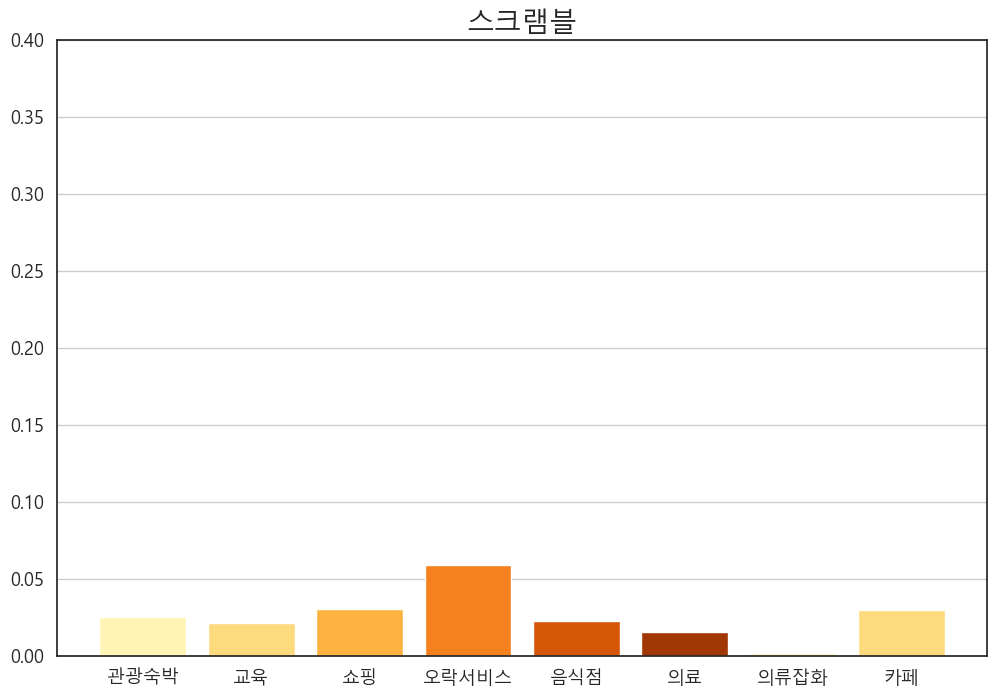

In [209]:
plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('스크램블', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area1_detail.index, area1_detail, color=color)
plt.grid(True, axis='y')

In [210]:
area1_sales_data = pd.DataFrame(columns=[
'상권_코드_명', '상권_구분_코드_명','연령대_20_매출_금액','연령대_20_매출_건수','연령대_30_매출_금액','연령대_30_매출_건수','연령대_40_매출_금액','연령대_40_매출_건수'
])


In [211]:
area1_sales_data.head()

,상권_코드_명,상권_구분_코드_명,연령대_20_매출_금액,연령대_20_매출_건수,연령대_30_매출_금액,연령대_30_매출_건수,연령대_40_매출_금액,연령대_40_매출_건수


In [212]:
for area in area1:
    area1_sales_data = area1_sales_data.append(result_data[['상권_코드_명', '상권_구분_코드_명','연령대_20_매출_금액','연령대_20_매출_건수','연령대_30_매출_금액','연령대_30_매출_건수','연령대_40_매출_금액','연령대_40_매출_건수']][result_data['상권_코드_명'] == area])

In [213]:
result_data['상권_구분_코드_명'].value_counts()

골목상권    1085
전통시장     284
발달상권     248
관광특구       6
Name: 상권_구분_코드_명, dtype: int64

In [214]:

area1_sales_data.head()

,상권_코드_명,상권_구분_코드_명,연령대_20_매출_금액,연령대_20_매출_건수,연령대_30_매출_금액,연령대_30_매출_건수,연령대_40_매출_금액,연령대_40_매출_건수
1,GS강동자이아파트,골목상권,2.492078e+09,276871.0,4.565933e+09,369818.0,7.156732e+09,373773.0
2,G타워,골목상권,5.886505e+09,846197.0,7.422581e+09,901689.0,3.391595e+09,325207.0
3,KB국민은행 망원동지점,골목상권,5.970194e+09,307749.0,7.899643e+09,344687.0,7.786417e+09,315788.0
9,KT구로지사,골목상권,1.968532e+09,247804.0,2.959832e+09,301318.0,2.923650e+09,253876.0
12,KT월곡지사,골목상권,6.943908e+08,85496.0,1.632231e+09,133026.0,2.271084e+09,131859.0


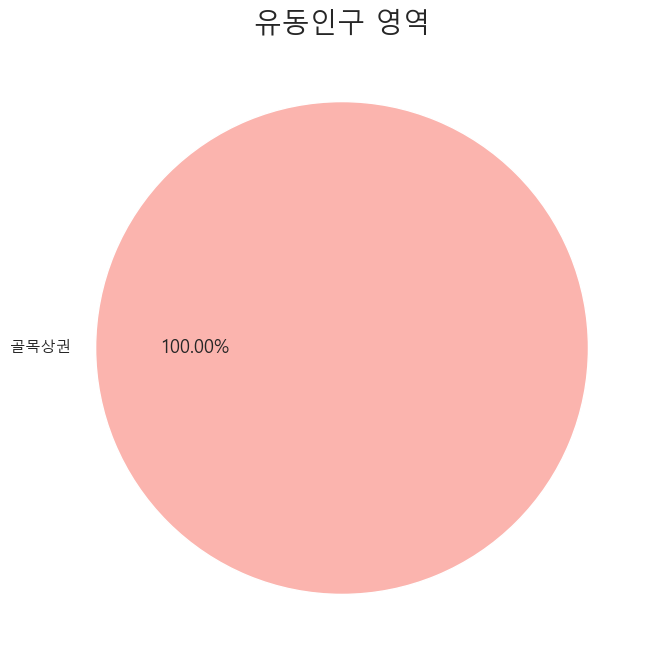

In [215]:
color = sns.color_palette("Pastel1", 4)
plt.title('유동인구 영역', fontsize=20)
plt.rcParams['font.size'] = 13
plt.pie(area1_sales_data['상권_구분_코드_명'].value_counts(), labels=area1_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

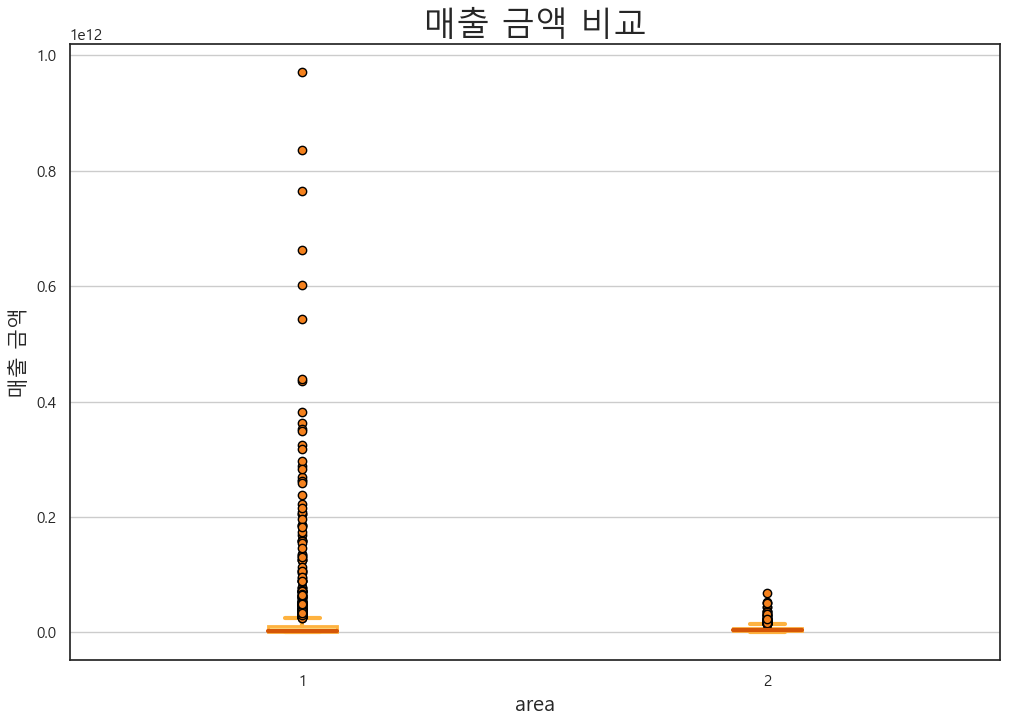

In [216]:
# 매출 비교 
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_20_매출_금액'],area1_sales_data['연령대_20_매출_금액']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 금액 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 금액', fontsize=15)
plt.show()

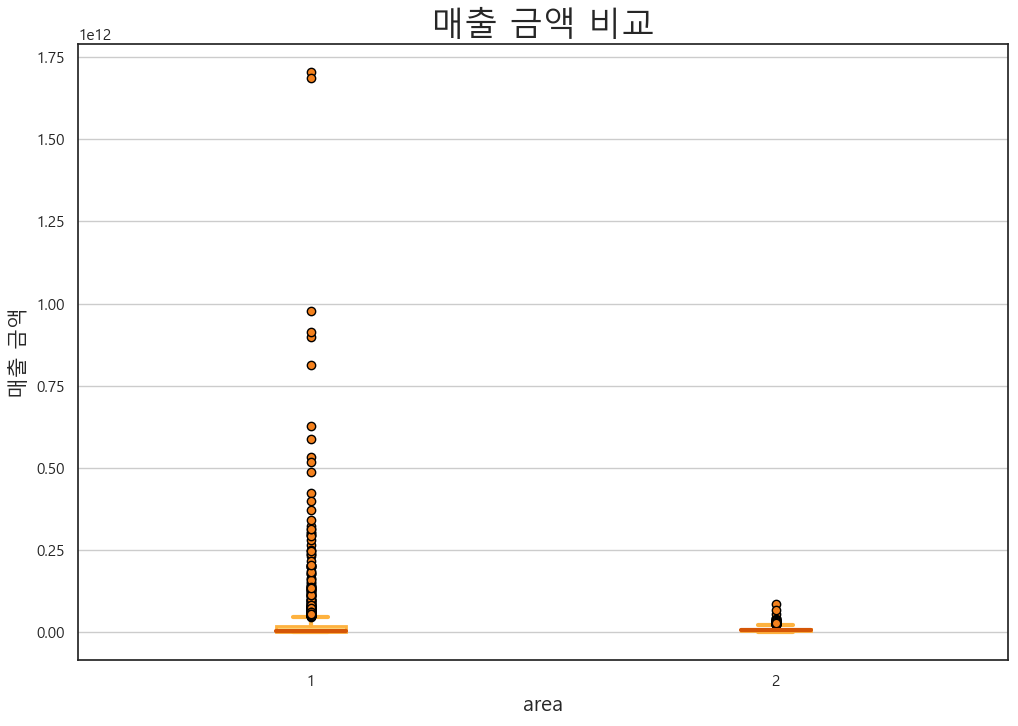

In [217]:
# 매출 비교 
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_30_매출_금액'],area1_sales_data['연령대_30_매출_금액']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 금액 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 금액', fontsize=15)
plt.show()

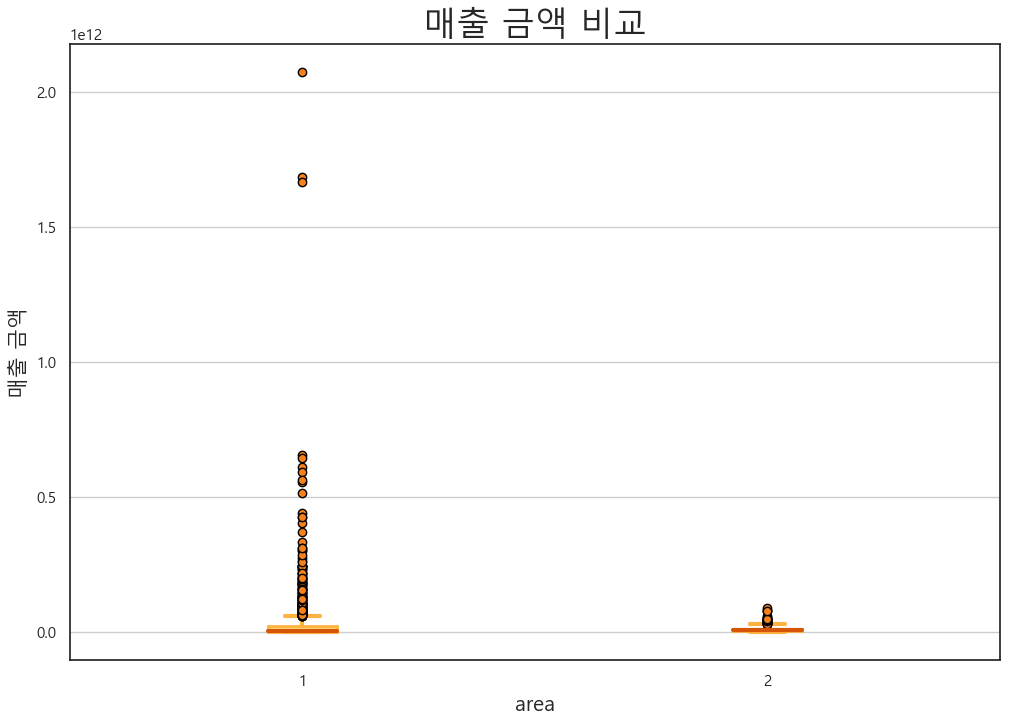

In [218]:
# 매출 비교 
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_40_매출_금액'],area1_sales_data['연령대_40_매출_금액']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 금액 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 금액', fontsize=15)
plt.show()

In [228]:
print(area0_sales_data['연령대_40_매출_금액'].mean())
print(area1_sales_data['연령대_40_매출_금액'].mean())

34710985551.95049
10377215815.328125


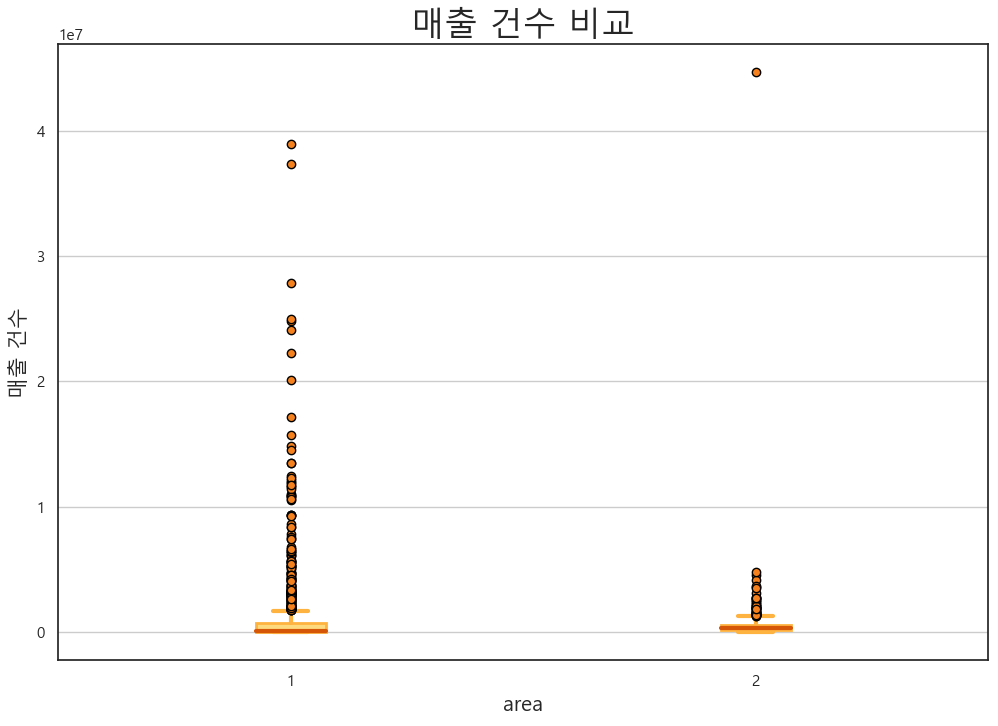

In [219]:

color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_20_매출_건수'],area1_sales_data['연령대_20_매출_건수']],
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 건수 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 건수', fontsize=15)
plt.show()

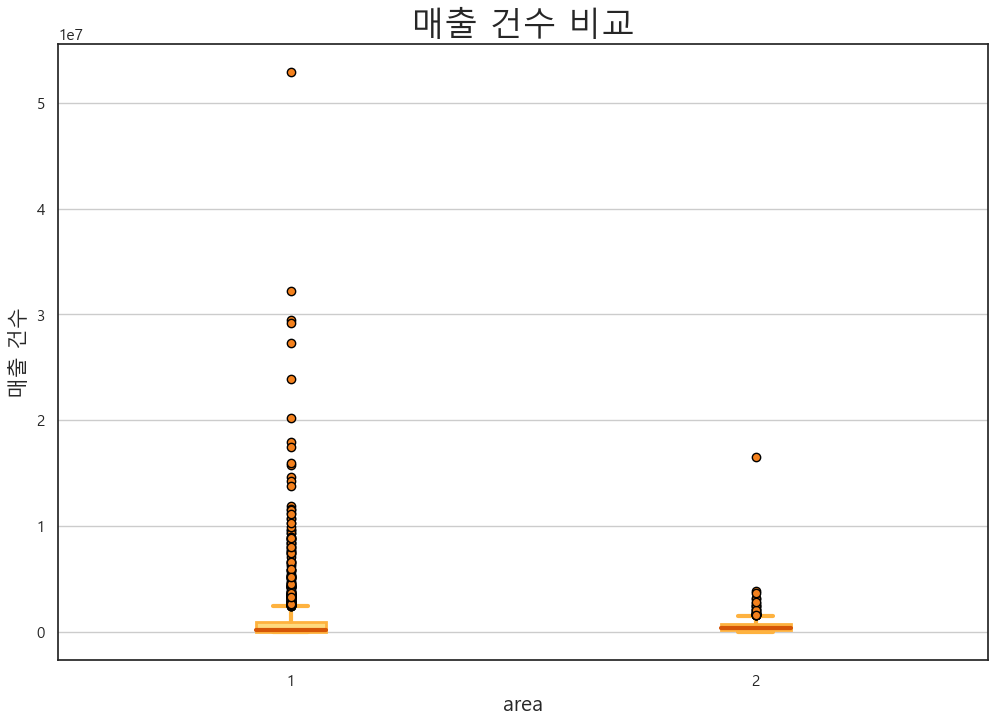

In [220]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_30_매출_건수'],area1_sales_data['연령대_30_매출_건수']],
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 건수 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 건수', fontsize=15)
plt.show()

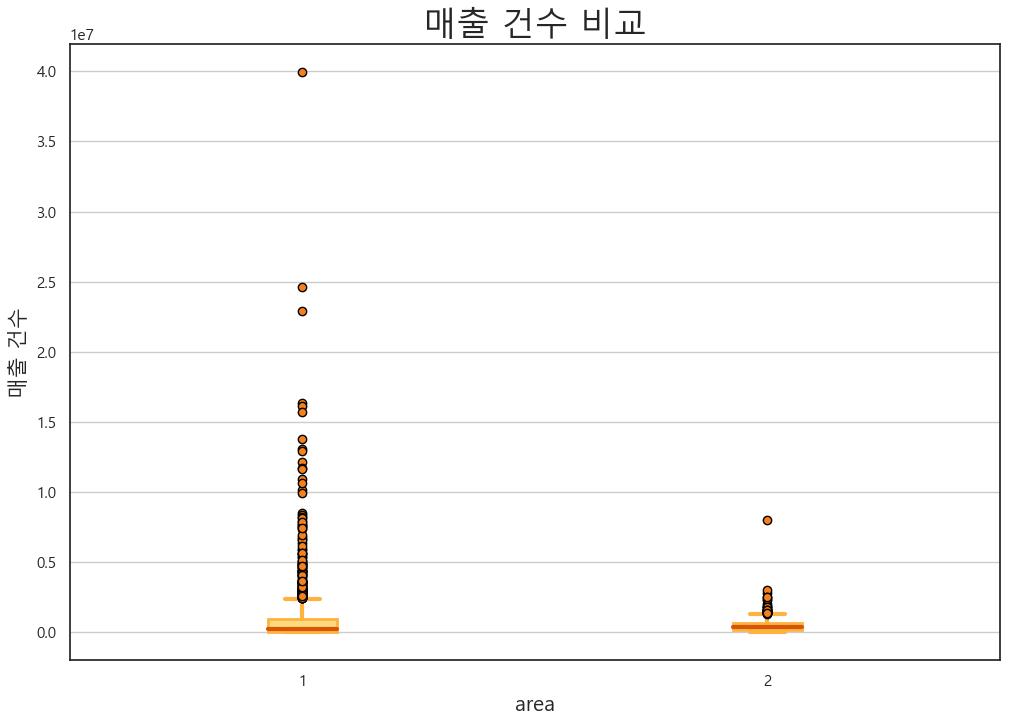

In [221]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['연령대_40_매출_건수'],area1_sales_data['연령대_40_매출_건수']],
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 건수 비교', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 건수', fontsize=15)
plt.show()

In [229]:
print(area0_sales_data['연령대_40_매출_건수'].mean())
print(area1_sales_data['연령대_40_매출_건수'].mean())

1040154.7857785779
497411.11328125
